# 1.0extract_info

In [ ]:
from bs4 import BeautifulSoup
import json
import os
file_counter=1
glob_control=dict()
def create_directory_with_pages(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# function to extract telephone number from html file
def extract_telephone(html_file):
    with open(html_file, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')
        script_tag = soup.find('script', type='application/ld+json')
        if script_tag:
            data = json.loads(script_tag.string)
            if 'telephone' in data:
                return data['telephone']
# function to extract payment methods from html file        
def extract_payment(html_file):
    with open(html_file, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')
        script_tag = soup.find('script', type='application/ld+json')
        if script_tag:
            data = json.loads(script_tag.string)
            if 'paymentAccepted' in data:
                return [data['paymentAccepted']]
# function to extract restaurant name
def name_restaurant(html_file):
    with open(html_file, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')
        script_tag = soup.find('script', type='application/ld+json')
        if script_tag:
            data = json.loads(script_tag.string)
            if 'name' in data:
                return [data['name']]  
# function to extract address of the restaurant
def address_restaurant(html_file):
    with open(html_file, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')
        script_tag = soup.find('script', type='application/ld+json')
        if script_tag:
            data = json.loads(script_tag.string)
            if 'address' in data:
                return [data['address']]
# function to extract description of the restaurant
def description_restaurant(html_file):
    with open(html_file, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')
        data_sheet_description = soup.find('div', class_='data-sheet__description')
        data_sheet_texts = ''
        if data_sheet_description:
            data_sheet_texts=data_sheet_description.get_text(strip=True).replace('\n', '')
        return data_sheet_texts
            
# function to extract services from html file
def extract_services(html_file):
                with open(html_file, 'r', encoding='utf-8') as file:
                    soup = BeautifulSoup(file, 'html.parser')
                    services_div = soup.find('div', class_='restaurant-details__services')
                    if services_div:
                        ul_tag = services_div.find('ul')
                        if ul_tag:
                            li_tags = ul_tag.find_all('li')
                            return [li.get_text(strip=True) for li in li_tags]
                return []

def extract_data_sheet_block_text(html_file):
                    with open(html_file, 'r', encoding='utf-8') as file:
                        soup = BeautifulSoup(file, 'html.parser')
                        data_sheet_div = soup.find('div', class_='data-sheet__block')
                        data_sheet_texts = []
                        for div in data_sheet_div.find_all('div', class_='data-sheet__block--text'):
                            data_sheet_texts.append(div.get_text(strip=True).replace('\n', ''))
                        return data_sheet_texts
                        
                    return ""
# function to extract website link from html file
def extract_links(html_file):
                        with open(html_file, 'r', encoding='utf-8') as file:
                            soup = BeautifulSoup(file, 'html.parser')
                            links = soup.find_all('div', class_='collapse__block-item link-item')
                            hrefs = [link.find('a')['href'] for link in links if link.find('a')]
                            if hrefs:
                                return hrefs[0]
                            else:
                                return ""
# function to write extracted data to tsv file                       
def write_data_to_file(html_file):
    # file_counter is a global variable which i used to skip some files

    global file_counter
    global glob_control
    # below we extract the data from html file
    telephones = extract_telephone(html_file)
    if telephones==None:
         telephones=''
    
    payments = extract_payment(html_file)
    if payments!=None:
        payments=payments[0].split(",")
    
    # below we extract the data from html file
    names=name_restaurant(html_file)
    name_rest=names[0]
    addresses=address_restaurant(html_file)[0]
    street=addresses['streetAddress']
    postal_code=addresses['postalCode']
    address_locality=addresses['addressLocality']
    review=description_restaurant(html_file)
    description=review
    finder_services=extract_services(html_file)
    data_sheet=extract_data_sheet_block_text(html_file)
    country=data_sheet[0].split(", ")[-1]
    cuisine_price=data_sheet[1]
    cuisine_price=cuisine_price.split("  ")
    cuisine_price = [item.strip() for item in cuisine_price if item!='' and item!='·']
    price=cuisine_price[0]
    cuisine=cuisine_price[1]
    links=extract_links(html_file)
    namer=name_rest.replace('"',"").replace("|","").replace("/","").replace("*","")
    if namer not in glob_control:
        glob_control[namer]=1
    else:
        glob_control[namer]+=1
        namer=namer+str(glob_control[namer])
  
    # below we elaborate on the data
    street=" ".join(street.replace('\n', '').strip().split())
    address_locality=address_locality.replace('\n', '').strip()
    description=description.replace('\n', '').strip()
    
    # below we write the data to the file using requested tsv format
    
    with open('restaurants_tsv/'+'restaurant_'+str(file_counter)+'.tsv', 'w',encoding='utf-8') as file:
        file.write(f"restaurantName\taddress\tCity\tpostalCode\tcountry\tpriceRange\tcuisineType\tdescription\tfacilitiesServices\tcreditCards\tphoneNumber\twebsite\n")
        file.write(f"{name_rest}\t{street}\t{address_locality}\t{postal_code}\t{country}\t{price}\t{cuisine}\t{description}\t{finder_services}\t{payments}\t{telephones}\t{links}\n")
        file_counter+=1
        
if __name__ == "__main__":
    counter=0
    # loop over 100 downloaded pages because on the website we have 100 pages

    for i in range(1,101):
        directory = f'html_code/page_{i}'
        if os.path.exists(directory):
            for filename in os.listdir(directory):
                if filename.endswith('.html'):
                    html_file = os.path.join(directory, filename)
                    write_data_to_file(html_file)
                    counter+=1

                    





This script processes the HTML files of Michelin restaurants to extract detailed information. Using BeautifulSoup, it retrieves data such as the restaurant’s name, address, phone number, payment methods, services, cuisine type, price range, and website link. The extracted data is cleaned and structured to handle missing or improperly formatted fields. Finally, it saves the information into well-organized .tsv files, ensuring each file corresponds to a specific restaurant and follows a sequential numbering system.


# 1.1get_html

In [ ]:
import os
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
def create_directory_with_pages(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
def read_lines_from_file(file_path,page):
    # start from page 1 but if u will blocked it is also possible to change this parameter
    
    dict_of_pages=dict()
    list_of_urls=[]
    chrome_options = Options()
    chrome_options.add_argument('--kiosk-printing')  # Enable silent printing
    chrome_options.add_argument("--log-level=3")  # Set log level to severe
    chrome_options.add_experimental_option('excludeSwitches', ['enable-logging'])
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service,options=chrome_options)
   
    iterator=0
   
    
    with open(file_path, 'r') as file:
            
            list_of_urls.append(line.strip())
            # check if elements are 20 or if we reached the end of page
            if len(list_of_urls)==20 or line==None:
                                
                for element in list_of_urls:
                    driver.get(element)
                    if iterator==0:
                        # click accept button for cookies
                        agree_button = driver.find_element(By.XPATH,'//*[@id="didomi-notice-agree-button"]')
                        agree_button.click()
                        iterator+=1 
                    html_code=driver.page_source
                    create_directory_with_pages('html_code/page_'+str(page))
                    name_rest=element.replace('https://guide.michelin.com/en/','')
                    name_rest=name_rest.replace('/','_')
                    # below we save html code to the file
                    with open(f'html_code/page_{page}/'+name_rest+'.html', 'w',encoding='utf-8') as file:
                        file.write(html_code)
                dict_of_pages[page]=list_of_urls
                list_of_urls=[]
                page+=1
                if page==101:
                    break


            # each page contains 20 restaurants and then save maybe 4 pages at a time

# Example usage
if __name__ == "__main__":
    create_directory_with_pages('html_code')
    read_lines_from_file('urls/urls.txt',page=1)
    

This script automates the process of downloading restaurant page HTML files. It reads a list of URLs and uses Selenium to navigate to each webpage. It manages web elements, such as cookie consent, to enable smooth access. The HTML content of each page is saved in a structured directory (html_code), with subdirectories based on page numbers for easy organization. The script processes URLs in batches of 20, improving efficiency while ensuring orderly storage of data.


# 1.2get_urls

In [ ]:
import os
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
import time
from selenium.webdriver.common.by import By


# create a folder to store text file with urls
folder_path = 'urls'

if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    file_path = os.path.join(folder_path, 'urls.txt')
    if not os.path.exists(file_path):
        with open(file_path, 'w') as file:
            pass


def webscrap_michelin_page():
    # create a webdriver object for running the script
    chrome_options = Options()
    chrome_options.add_argument('--kiosk-printing')  # Enable silent printing
    chrome_options.add_argument("--log-level=3")  # Set log level to severe
    chrome_options.add_experimental_option('excludeSwitches', ['enable-logging'])
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service,options=chrome_options)
    # link to the michelin page
    restaurant_page='https://guide.michelin.com/en/it/restaurants/page/'
    # loop over 100 pages
    for i in range(1,101):
    #driver = webdriver.Chrome(ChromeDriverManager().install())
        driver.get(restaurant_page+str(i))
        # remove cookies
        if i==1:
            # this we need to accept the cookies
            agree_button = driver.find_element(By.XPATH,'//*[@id="didomi-notice-agree-button"]')
            agree_button.click()
        data_field = driver.find_element(By.XPATH, "//div[@class='row restaurant__list-row js-restaurant__list_items']")
        
        child_elements = data_field.find_elements(By.XPATH, "./*") 
        for element in child_elements:
            # here i find elements related to 'a' tag
            element_next_page=element.find_element(By.XPATH, ".//a[@class='link']")
            # get link and then write it to the file
            href = element_next_page.get_attribute('href')
            with open(file_path, 'a') as file:
                file.write(href + '\n')
        # below we can adjust the time to wait for the next page because of the website block
        time.sleep(6)
        
    
# explicitly declare the filepath 
   
file_path = 'urls/urls.txt'

webscrap_michelin_page()







This script scrapes the URLs of Michelin restaurant pages from the official guide’s website. It automates browser navigation through 100 pages of listings in the Italy section, locating and extracting links to individual restaurant pages. The script handles cookie consent on the first page and saves the extracted URLs to a text file (urls/urls.txt). It also implements delays between page navigations to avoid triggering anti-bot mechanisms, ensuring reliable data collection.

# 2.0.0preprocessing

In [ ]:
import os
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

#to remove common words from texts (stopwords) and reduce words to their root (stemming)
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

#text processing
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)
#Process restaurant descriptions in TSV files
def preprocess_restaurant_descriptions(folder_path, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".tsv"):
            file_path = os.path.join(folder_path, filename)
            
            df = pd.read_csv(file_path, sep='\t')
            #create a new column 'processed_description'
            df['processed_description'] = df['description'].apply(preprocess_text)
            
            output_path = os.path.join(output_folder, filename)
            df.to_csv(output_path, sep='\t', index=False)

if __name__ == "__main__":
    
    folder_path = "restaurants_tsv"  #folder with input files
    output_folder = "processed_files"  #folder with output files
    
    preprocess_restaurant_descriptions(folder_path, output_folder)

This script processes the restaurant descriptions found in .tsv files through a text preprocessing pipeline. First, it removes non-alphanumeric characters and stopwords (common words like “the,” “and,” etc.) from the descriptions, applying stemming to reduce words to their root form, making the text more uniform and ready for further analysis. It then reads each .tsv file from the restaurants_tsv folder, adding a new column called processed_description that contains the preprocessed descriptions. Finally, the updated files are saved in the processed_files folder, maintaining the .tsv format. This process is designed to prepare restaurant descriptions for tasks such as building search engines or performing textual analysis.

# 2.1.1voc_and_inv_ind

In [2]:
import os
import pandas as pd
import json
from collections import defaultdict
def build_vocabulary_and_inverted_index(folder_path, output_vocab_file, output_index_file):
    vocabulary = {}
    inverted_index = defaultdict(list)
    term_id_counter = 0  #counter to assign term_ids
    files_processed = 0  #counter for processed files
    skipped_files = []  #list for skipped files
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".tsv"):
            file_path = os.path.join(folder_path, filename)
            doc_id = filename.split('.')[0]  #use the file name (without extension) as 'doc_id'
            
            df = pd.read_csv(file_path, sep='\t')
            
            #verify that the 'processed_description' column exists
            if 'processed_description' in df.columns:
                description = df['processed_description'].iloc[0]
                if not isinstance(description, str):
                    print(f"Invalid description in file {filename}, skipped.")
                    skipped_files.append(filename)  #record skipped files
                    continue  
                #tokenize the description
                terms = description.split()
                  
                
                #update the vocabulary and the inverted index
                for term in terms:
                    if term not in vocabulary:
                        
                        vocabulary[term] = term_id_counter
                        term_id_counter += 1
                        
                    
                    term_id = vocabulary[term]
                    
                    #adds the current document to the list for the term_id, if it is not already present
                    if doc_id not in inverted_index[term_id]:
                        inverted_index[term_id].append(doc_id)
                        
            
            files_processed += 1  
    
    #saves the vocabulary
    vocab_df = pd.DataFrame(list(vocabulary.items()), columns=['term', 'term_id'])
    vocab_df.to_csv(output_vocab_file, index=False)
    print(f"Vocabulary saved in {output_vocab_file}")
    
    #saves the inverted index
    with open(output_index_file, 'w') as f:
        json.dump(inverted_index, f, indent=4)
    print(f"Inverted index saved in {output_index_file}")
    
    #print final counts
    print(f"Total number of files processed: {files_processed}")
    print(f"Total number of unique terms in the vocabulary: {len(vocabulary)}")
    
    #print the skipped files
    if skipped_files:
        print("Files with invalid descriptions (not processed):")
        for filename in skipped_files:
            print(f"- {filename}")

if __name__ == "__main__":
    folder_path = "processed_files"  #folder with input files
    output_vocab_file = "vocabulary.csv"  #A CSV file that assigns a unique term_id to each term found in the preprocessed descriptions
    output_index_file = "inverted_index.json" #A JSON file that maps each term_id to a list of doc_ids (documents) in which the term appears
    
    build_vocabulary_and_inverted_index(folder_path, output_vocab_file, output_index_file)

Vocabulary saved in vocabulary.csv
Inverted index saved in inverted_index.json
Total number of files processed: 1983
Total number of unique terms in the vocabulary: 7824


This script builds a vocabulary and an inverted index from processed restaurant descriptions stored in .tsv files. It reads the processed_description column from each file in the processed_files directory. For each word in the description, the script assigns a unique term_id if the word is not already in the vocabulary. It also creates an inverted index, mapping each term_id to the documents (doc_id) where the term appears.
The vocabulary, containing terms and their corresponding term_id, is saved as a CSV file (vocabulary.csv), while the inverted index, mapping term_id to document IDs, is saved as a JSON file (inverted_index.json). The script handles invalid or missing descriptions by skipping those files and reporting them. It prints the number of files processed, the number of unique terms in the vocabulary, and a list of skipped files if any.

# 2.1.2execute_query

In [2]:
import os
import pandas as pd
import json
import re
from tabulate import tabulate
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_query(query):
    query = query.lower()
    query = re.sub(r'[^\w\s]', '', query)
    tokens = [stemmer.stem(word) for word in query.split() if word not in stop_words]
    return tokens

def load_index(vocab_file, index_file):
    vocab_df = pd.read_csv(vocab_file)
    vocabulary = dict(zip(vocab_df['term'], vocab_df['term_id']))

    with open(index_file, 'r') as f:
        inverted_index = json.load(f)

    return vocabulary, inverted_index

def execute_conjunctive_query(query, vocabulary, inverted_index, folder_path):
    # Preprocess the query
    query_terms = preprocess_query(query)
    print(f"Query terms after preprocessing: {query_terms}")

    # Find the term_ids for each query term
    term_ids = [vocabulary.get(term) for term in query_terms if term in vocabulary]
    term_ids = [term_id for term_id in term_ids if term_id is not None]
    print(f"term_id found in query: {term_ids}")

    if not term_ids:
        print("No query terms found in the vocabulary.")
        return []

    # Find doc_ids that contain all term_ids
    doc_sets = [set(inverted_index[str(term_id)]) for term_id in term_ids if str(term_id) in inverted_index]
    common_docs = set.intersection(*doc_sets) if doc_sets else set()
    print(f"doc_id comuni trovati: {common_docs}")

    # Collect restaurant details for found doc_ids
    results = []
    for doc_id in common_docs:
        file_path = os.path.join(folder_path, f"{doc_id}.tsv")
        df = pd.read_csv(file_path, sep='\t')
        restaurant_info = {
            "Restaurant Name": df['restaurantName'].iloc[0],
            "Address": df['address'].iloc[0],
            "Description": df['description'].iloc[0],
            "Website": df['website'].iloc[0]
        }
        results.append(restaurant_info)

    # Create the results DataFrame
    results_df = pd.DataFrame(results, columns=["Restaurant Name", "Address", "Description", "Website"])
    return results_df

def display_results(results_df):
    # Print results as a formatted table using tabulate
    table = tabulate(results_df, headers="keys", tablefmt="grid", showindex=False)
    print(table)

if __name__ == "__main__":
    vocab_file = "vocabulary.csv"
    index_file = "inverted_index.json"
    folder_path = "processed_files"

    vocabulary, inverted_index = load_index(vocab_file, index_file)

    # Prompt the user for the query
    query = input("Enter your query: ")
    results_df = execute_conjunctive_query(query, vocabulary, inverted_index, folder_path)

    # Show results
    if not results_df.empty:
        display_results(results_df)
    else:
        print("No results found for the given query.")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fabrizioferrara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Query terms after preprocessing: ['modern', 'season', 'cuisin']
term_id found in query: [9, 703, 10]
doc_id comuni trovati: {'restaurant_38', 'restaurant_84', 'restaurant_1805', 'restaurant_1633', 'restaurant_1818', 'restaurant_1073', 'restaurant_331', 'restaurant_216', 'restaurant_935', 'restaurant_441', 'restaurant_1547', 'restaurant_981', 'restaurant_1791', 'restaurant_1144', 'restaurant_881', 'restaurant_1903', 'restaurant_628', 'restaurant_1544', 'restaurant_1626', 'restaurant_1893', 'restaurant_405', 'restaurant_1335', 'restaurant_695', 'restaurant_1852', 'restaurant_1675', 'restaurant_324', 'restaurant_634', 'restaurant_1686', 'restaurant_190', 'restaurant_318', 'restaurant_1806', 'restaurant_1310', 'restaurant_813', 'restaurant_1945', 'restaurant_1453', 'restaurant_1569', 'restaurant_906', 'restaurant_1724', 'restaurant_1298', 'restaurant_1213', 'restaurant_496'}
+---------------------------------+------------------------------------------+--------------------------------------

This script implements a conjunctive search engine for Michelin restaurants using a vocabulary and an inverted index. The user-provided query is preprocessed (cleaned and stemmed) and matched against the index to find documents containing all the terms. The details of the matching restaurants are extracted from TSV files and displayed in a formatted table. If no results are found, the user is notified.

# 2.2.1tfidf_index.py

In [12]:
import os
import pandas as pd
import json
import math
from collections import defaultdict, Counter

def calculate_tf_idf(folder_path, output_index_file):
    #dictionaries for TF and count of documents containing each term
    term_doc_freq = defaultdict(int)  #document count for each term
    doc_term_freq = {}  
    total_docs = 0  
    total_terms = 0  
    unique_terms = set()  #set to track unique terms

    #calculating frequencies
    print("Start processing documents...")
    for filename in os.listdir(folder_path):
        if filename.endswith(".tsv"):
            file_path = os.path.join(folder_path, filename)
            doc_id = filename.split('.')[0]
            
            df = pd.read_csv(file_path, sep='\t')
            if 'processed_description' in df.columns:
                description = df['processed_description'].iloc[0]
                
                #tokenize the description and count the frequency of the terms
                terms = description.split()
                total_terms += len(terms)  #add the number of terms
                term_freq = Counter(terms)
                doc_term_freq[doc_id] = term_freq  #save TF for this document
                total_docs += 1  
                
                #increase the document count for each term and add unique terms
                for term in term_freq.keys():
                    term_doc_freq[term] += 1
                    unique_terms.add(term)

    print(f"Total documents processed: {total_docs}")
    print(f"Total words processed: {total_terms}")
    print(f"Total number of unique terms in the vocabulary: {len(unique_terms)}")

    #calculate TF-IDF and construct the inverted index
    print("Calculating TF-IDF scores and constructing the inverted index...")
    tfidf_index = defaultdict(list)
    for doc_id, term_freq in doc_term_freq.items():
        norm_factor = math.sqrt(sum((tf / sum(term_freq.values())) ** 2 for tf in term_freq.values()))  #normalization
        for term, tf in term_freq.items():
            #calculate TF (term frequency / total terms in document)
            tf_value = tf / sum(term_freq.values())
            #calculate IDF (logarithm of total number of documents divided by documents containing the term)
            idf_value = math.log(total_docs / (1 + term_doc_freq[term]))
            #calculate TF-IDF
            tfidf_score = tf_value * idf_value
            #normalize TF-IDF
            tfidf_score /= norm_factor if norm_factor > 0 else 1
            
            tfidf_index[term].append((doc_id, tfidf_score))

    print("Inverted index with TF-IDF successfully constructed")

    #saves inverted index with TF-IDF
    with open(output_index_file, 'w') as f:
        json.dump(tfidf_index, f, indent=4)
    
    print(f"Inverted index with TF-IDF saved in {output_index_file}")

if __name__ == "__main__":
    folder_path = "processed_files"  
    output_index_file = "tfidf_inverted_index.json"  #output file
    
    calculate_tf_idf(folder_path, output_index_file)

Start processing documents...
Total documents processed: 1983
Total words processed: 87238
Total number of unique terms in the vocabulary: 7824
Calculating TF-IDF scores and constructing the inverted index...
Inverted index with TF-IDF successfully constructed
Inverted index with TF-IDF saved in tfidf_inverted_index.json


This script calculates the TF-IDF (Term Frequency-Inverse Document Frequency) scores for restaurant descriptions stored in processed TSV files. It begins by processing each document to count term frequencies (TF) and determine how many documents contain each term (document frequency). The script also tracks the total number of documents, words, and unique terms across the dataset.
Using this data, it calculates TF-IDF scores for each term in each document. TF is calculated as the proportion of term occurrences within a document, while IDF reflects how common or rare the term is across all documents. Each TF-IDF score is then normalized to ensure consistency across documents of varying lengths.
Finally, the script constructs an inverted index where each term is associated with a list of document IDs and their corresponding normalized TF-IDF scores. This index is saved as a JSON file for use in search engines or further analysis.

# 2.2.2ranked_query

In [3]:
import os
import pandas as pd
import json
import math
import re
from tabulate import tabulate  # Libreria per visualizzare i dati come tabella
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import defaultdict

import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_query(query):
    query = query.lower()
    query = re.sub(r'[^\w\s]', '', query)
    tokens = [stemmer.stem(word) for word in query.split() if word not in stop_words]
    return tokens

# Calculate TF-IDF vector for query terms
def calculate_query_tfidf(query_terms, vocabulary, inverted_index, total_docs):
    query_tf = defaultdict(int)
    for term in query_terms:
        query_tf[term] += 1
    
    query_tfidf = {}
    norm_factor = 0  # Normalization factor for query vector
    for term, tf in query_tf.items():
        # TF for query
        tf_value = tf / len(query_terms)
        # IDF for query
        idf_value = math.log(total_docs / (1 + len(inverted_index.get(term, []))))
        tfidf_score = tf_value * idf_value
        query_tfidf[term] = tfidf_score
        norm_factor += tfidf_score ** 2 
    # Vector normalization
    norm_factor = math.sqrt(norm_factor)
    for term in query_tfidf:
        query_tfidf[term] /= norm_factor if norm_factor > 0 else 1
    
    return query_tfidf

# Calculate the cosine similarity between the query vector and a document vector
def cosine_similarity(query_vector, doc_vector):
    dot_product = sum(query_vector[term] * doc_vector.get(term, 0) for term in query_vector)
    query_norm = math.sqrt(sum(value ** 2 for value in query_vector.values()))
    doc_norm = math.sqrt(sum(value ** 2 for value in doc_vector.values()))
    if query_norm == 0 or doc_norm == 0:
        return 0.0
    return dot_product / (query_norm * doc_norm)

def execute_ranked_query(query, vocabulary, inverted_index, folder_path, total_docs, k):
    # Preprocess la query
    query_terms = preprocess_query(query)
    print(f"Query terms after preprocessing: {query_terms}")
    
    # Filter terms not present in the index
    query_terms = [term for term in query_terms if term in inverted_index]
    if not query_terms:
        print("No query terms found in index.")
        return pd.DataFrame()
    
    # Calculate the vector TF-IDF for query
    query_tfidf = calculate_query_tfidf(query_terms, vocabulary, inverted_index, total_docs)
    print(f"TF-IDF vector of the query (normalized): {query_tfidf}")
    
    # Calculate the cosine similarity for each document that contains at least one query term
    doc_scores = {}
    for term in query_terms:
        for doc_id, tfidf_score in inverted_index[term]:
            if doc_id not in doc_scores:
                doc_scores[doc_id] = defaultdict(float)
            doc_scores[doc_id][term] = tfidf_score
    
    # Calculate the cosine similarity between the query and each document
    results = []
    for doc_id, doc_vector in doc_scores.items():
        similarity = cosine_similarity(query_tfidf, doc_vector)
        if similarity > 0:
            results.append((doc_id, similarity))
            
    
    # Sort results by similarity and return top-k
    results = sorted(results, key=lambda x: x[1], reverse=True)[:k]
    
    # Collect restaurant details for found doc_ids
    restaurant_results = []
    for doc_id, score in results:
        file_path = os.path.join(folder_path, f"{doc_id}.tsv")
        df = pd.read_csv(file_path, sep='\t')
        restaurant_info = {
            "restaurantName": df['restaurantName'].iloc[0],
            "address": df['address'].iloc[0],
            "description": df['description'].iloc[0],
            "website": df['website'].iloc[0],
            "similarity_score": score
        }
        restaurant_results.append(restaurant_info)
    
    # Creating the results DataFrame
    results_df = pd.DataFrame(restaurant_results, columns=["restaurantName", "address", "description", "website", "similarity_score"])
    return results_df

if __name__ == "__main__":
    
    vocab_file = "vocabulary.csv"  # Vocabulary path
    index_file = "tfidf_inverted_index.json"  # Inverted index with TF-IDF path
    folder_path = "processed_files"  # Input files
    
    # Load vocabulary and index inverted
    with open(index_file, 'r') as f:
        inverted_index = json.load(f)
    total_docs = len(os.listdir(folder_path))
    
    # Prompts the user for the query
    query = input("Enter your query: ")
    k = int(input("Enter the number of top-k results to display: "))
    results_df = execute_ranked_query(query, None, inverted_index, folder_path, total_docs, k)
    
    # Show results
    if not results_df.empty:
        # Display the results as a formatted table
        print(tabulate(results_df, headers="keys", tablefmt="grid", showindex=False))
    else:
        print("No results found for the given query.")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fabrizioferrara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Query terms after preprocessing: ['near', 'teatro', 'bellini', 'econom', 'modern']
TF-IDF vector of the query (normalized): {'near': 0.2793979098777641, 'teatro': 0.528425865586487, 'bellini': 0.5614203793917822, 'econom': 0.5614203793917822, 'modern': 0.11098300654732378}
+------------------+-----------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

This script implements a search engine based on TF-IDF and cosine similarity to find the most relevant restaurants for a user’s query. The query is preprocessed to remove stopwords, normalize, and reduce terms to their root form. A TF-IDF vector is then calculated for the query and compared with indexed documents using cosine similarity. Relevant documents are ranked by similarity score, and the restaurant details (name, address, description, website) are extracted and displayed in a clear and readable table.

# 3custom_score

In [14]:
import os
import pandas as pd
import json
import math
import re
import heapq
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import defaultdict
from tabulate import tabulate

import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Preprocess la query
def preprocess_query(query):
    query = query.lower()
    query = re.sub(r'[^\w\s]', '', query)
    tokens = [stemmer.stem(word) for word in query.split() if word not in stop_words]
    return tokens

def load_index(vocab_file, index_file):
    vocab_df = pd.read_csv(vocab_file)
    vocabulary = dict(zip(vocab_df['term'], vocab_df['term_id']))  # Convert the vocabulary into a dictionary
    
    with open(index_file, 'r') as f:
        inverted_index = json.load(f)
        
    return vocabulary, inverted_index

def execute_conjunctive_query(query, vocabulary, inverted_index, folder_path):
    query_terms = preprocess_query(query)
    term_ids = [vocabulary.get(term) for term in query_terms if term in vocabulary]
    term_ids = [term_id for term_id in term_ids if term_id is not None]
    
    if not term_ids:
        print("No query terms found in the vocabulary.")
        return []

    doc_sets = [set(inverted_index[str(term_id)]) for term_id in term_ids if str(term_id) in inverted_index]
    common_docs = set.intersection(*doc_sets) if doc_sets else set()
    
    results = []  # Collect restaurant details 
    for doc_id in common_docs:
        file_path = os.path.join(folder_path, f"{doc_id}.tsv")
        df = pd.read_csv(file_path, sep='\t')
        restaurant_info = {
            "restaurantName": df['restaurantName'].iloc[0],
            "address": df['address'].iloc[0],
            "description": df['description'].iloc[0],
            "website": df['website'].iloc[0],
            "doc_id": doc_id
        }
        results.append(restaurant_info)
    return results

def calculate_query_tfidf(query_terms, vocabulary, inverted_index, total_docs):
    query_tf = defaultdict(int)
    for term in query_terms:
        query_tf[term] += 1
    
    query_tfidf = {}
    norm_factor = 0
    for term, tf in query_tf.items():
        tf_value = tf / len(query_terms)
        idf_value = math.log(total_docs / (1 + len(inverted_index.get(term, []))))
        tfidf_score = tf_value * idf_value
        query_tfidf[term] = tfidf_score
        norm_factor += tfidf_score ** 2
    
    norm_factor = math.sqrt(norm_factor)
    for term in query_tfidf:
        query_tfidf[term] /= norm_factor if norm_factor > 0 else 1
    
    return query_tfidf

def cosine_similarity(query_vector, doc_vector):
    dot_product = sum(query_vector[term] * doc_vector.get(term, 0) for term in query_vector)
    query_norm = math.sqrt(sum(value ** 2 for value in query_vector.values()))
    doc_norm = math.sqrt(sum(value ** 2 for value in doc_vector.values()))
    if query_norm == 0 or doc_norm == 0:
        return 0.0
    return dot_product / (query_norm * doc_norm)

def execute_ranked_query(query, vocabulary, inverted_index, folder_path, total_docs, k):
    query_terms = preprocess_query(query)
    query_terms = [term for term in query_terms if term in inverted_index]
    if not query_terms:
        print("No query terms found in index.")
        return pd.DataFrame()
    
    query_tfidf = calculate_query_tfidf(query_terms, vocabulary, inverted_index, total_docs)
    doc_scores = {}
    for term in query_terms:
        for doc_id, tfidf_score in inverted_index[term]:
            if doc_id not in doc_scores:
                doc_scores[doc_id] = defaultdict(float)
            doc_scores[doc_id][term] = tfidf_score
    
    results = []
    for doc_id, doc_vector in doc_scores.items():
        similarity = cosine_similarity(query_tfidf, doc_vector)
        if similarity > 0:
            results.append((doc_id, similarity))
    # Sort results by similarity and return top-k
    results = sorted(results, key=lambda x: x[1], reverse=True)[:k]
    
    restaurant_results = []
    for doc_id, score in results:
        file_path = os.path.join(folder_path, f"{doc_id}.tsv")
        df = pd.read_csv(file_path, sep='\t')
        restaurant_info = {
            "restaurantName": df['restaurantName'].iloc[0],
            "address": df['address'].iloc[0],
            "description": df['description'].iloc[0],
            "website": df['website'].iloc[0],
            "similarity_score": score
        }
        restaurant_results.append(restaurant_info)
    
    results_df = pd.DataFrame(restaurant_results, columns=["restaurantName", "address", "description", "website", "similarity_score"])
    return results_df

def custom_score(restaurant, description_score, query_terms):
    description_weight = 0.45  # Weight for description
    cuisine_weight = 0.30  # Weight for the type of cuisine
    facilities_weight = 0.05  # Weight for services
    price_weight = 0.20  # Weight for the price range

    # Initialize the score with the description similarity
    score = description_score * description_weight

    # Added score for cuisine type
    cuisine_types = str(restaurant.get('cuisineType', '')).lower().split(',')
    cuisine_matches = sum(1 for term in query_terms if term in cuisine_types)
    if cuisine_matches > 0:
        score += (cuisine_matches / len(query_terms)) * cuisine_weight

    # Added score for services
    facilities = str(restaurant.get('facilitiesServices', '')).lower()
    facilities_matches = sum(1 for term in query_terms if term in facilities)
    if facilities_matches > 0:
        score += (facilities_matches / len(query_terms)) * facilities_weight

    # Price preference keyword Lists
    cheap_terms = ["cheap", "affordable", "budget", "low-cost", "inexpensive", "economical", "reasonably priced"]
    moderate_terms = ["moderate", "average", "mid-range", "fair-priced", "decent"]
    expensive_terms = ["expensive", "premium", "high-end", "luxury", "upscale", "costly", "exclusive", "top-tier"]

    # Price range score based on query preferences
    price_score = 0
    price = restaurant.get('priceRange', '')

    if any(term in query_terms for term in cheap_terms):
        if '€' in price:
            price_score += 2
        elif '€€' in price:
            price_score += 1

    elif any(term in query_terms for term in moderate_terms):
        if '€€' in price or '€€€' in price:
            price_score += 2
        else:
            price_score += 1

    elif any(term in query_terms for term in expensive_terms):
        if '€€€' in price or '€€€€' in price:
            price_score += 2
        elif '€€' in price:
            price_score += 1

    score += price_score * price_weight

    return round(score, 2)

def execute_custom_ranked_query(query, vocabulary, inverted_index, folder_path, total_docs, k):
    query_terms = preprocess_query(query)
    query_terms = [term for term in query_terms if term in inverted_index]
    if not query_terms:
        print("No query terms found in index.")
        return pd.DataFrame()

    query_tfidf = calculate_query_tfidf(query_terms, vocabulary, inverted_index, total_docs)
    doc_scores = {}
    for term in query_terms:
        for doc_id, tfidf_score in inverted_index[term]:
            if doc_id not in doc_scores:
                doc_scores[doc_id] = defaultdict(float)
            doc_scores[doc_id][term] = tfidf_score

    #use a heap to keep the top-k restaurants
    heap = []
    for doc_id, doc_vector in doc_scores.items():
        similarity = cosine_similarity(query_tfidf, doc_vector)
        if similarity > 0:
            file_path = os.path.join(folder_path, f"{doc_id}.tsv")
            df = pd.read_csv(file_path, sep='\t')
            restaurant_name = str(df['restaurantName'].iloc[0])
            address = str(df['address'].iloc[0])
            description = str(df['description'].iloc[0])
            website = str(df['website'].iloc[0]) if 'website' in df.columns else "N/A"
            price_range = str(df["priceRange"].iloc[0]) if "priceRange" in df.columns else "N/A"
            cuisine_type = str(df["cuisineType"].iloc[0]) if "cuisineType" in df.columns else "N/A"
            facilities_services = str(df["facilitiesServices"].iloc[0]) if "facilitiesServices" in df.columns else "N/A"

            #create restaurant object and calculate custom score
            restaurant = {
                "restaurantName": restaurant_name,
                "address": address,
                "description": description,
                "website": website,
                "priceRange": price_range,
                "cuisineType": cuisine_type,
                "facilitiesServices": facilities_services,
            }
            description_score = similarity
            score = float(custom_score(restaurant, description_score, query_terms))

            #push the tuple (score, details) into the heap
            heap_entry = (score, restaurant_name, address, description, website)
            if len(heap) < k:
                heapq.heappush(heap, heap_entry)
            else:
                heapq.heappushpop(heap, heap_entry)

    #extract the top-k results in descending order of scores
    top_k_results = sorted(heap, key=lambda x: -x[0])  #sort by score in descending order

    #create the final results list
    results = []
    for entry in top_k_results:
        score, restaurant_name, address, description, website = entry
        results.append({
            "restaurantName": restaurant_name,
            "address": address,
            "description": description,
            "website": website,
            "custom_score": score,
        })

    return pd.DataFrame(results, columns=["restaurantName", "address", "description", "website", "custom_score"])


if __name__ == "__main__":
    vocab_file = "vocabulary.csv"
    index_file = "tfidf_inverted_index.json"
    folder_path = "processed_files"
    
    vocabulary, inverted_index = load_index(vocab_file, index_file)
    total_docs = len(os.listdir(folder_path))
    
    query = input("Enter your query: ")
    k = int(input("Enter the number of top-k results to display: "))
    results_df = execute_custom_ranked_query(query, vocabulary, inverted_index, folder_path, total_docs, k)
    
    if not results_df.empty:
        print(tabulate(results_df, headers="keys", tablefmt="grid", showindex=False))
        results_df.to_csv("top_k_restaurants.csv", index=False)  #for RQ4
        print("Results saved in 'top_k_restaurants.csv'")
    else:
        print("No results found for the given query.")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fabrizioferrara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


+------------------+-----------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

This script combines a TF-IDF-based ranking search engine with a custom scoring system to find the most relevant restaurants based on user queries. The script processes the user’s query by removing stopwords, normalizing terms, and reducing them to their root form. It calculates a TF-IDF vector for the query, matches it against preprocessed restaurant descriptions, and ranks the results using cosine similarity. Additionally, a custom scoring system evaluates restaurants based on their cuisine, price range, and services, providing a more personalized ranking.
Results are sorted in descending order of relevance and presented in a structured table. The output includes details like the restaurant’s name, address, description, website, and custom score. The top-k results can be saved to a CSV file for further analysis. 

The query “near teatro bellini economic modern” introduces complex elements that require a sophisticated approach to identify the most relevant restaurants. Analyzing the results obtained from the two scripts reveals significant differences in their ranking logic and the criteria they use.
Script 2.2.2 relies on cosine similarity calculated from the TF-IDF vectors of the query and documents. This method ranks Ménage first with a similarity score of 0.788, highlighting a strong alignment between the restaurant’s description and key query terms, such as “near Teatro Bellini” and “modern.” However, the term “economic” has a less noticeable impact since the restaurant is not explicitly described as economical. Other restaurants, such as Hyle and Il Sanlorenzo, achieve lower scores but still appear in the results due to references relevant to the query, like Hyle’s economic and socially responsible model and Il Sanlorenzo’s modern style. This approach prioritizes precise textual matching but overlooks additional information such as cuisine type or price range.
Script 3, on the other hand, adopts a personalized ranking method that combines TF-IDF similarity with additional attributes, such as cuisine type, offered services, and price range. Here too, Ménage secures the top position but with a lower score of 0.35 because it does not fully meet the “economic” criterion. In contrast, Hyle achieves a relatively high score of 0.25 due to its emphasis on economic and sustainable practices, which better reflect the query. This ranking system allows restaurants like San Giorgio and Tenne Lodges to appear among the results despite having lower textual similarity scores in script 2.2.2. As a result, this approach offers greater flexibility for handling complex queries, though it may sacrifice textual precision by not focusing solely on term matching.
Both approaches identify Ménage as the top result but utilize different logics. The TF-IDF and cosine similarity-based method is ideal for queries requiring strict textual matching, while the personalized ranking in script 3 provides a more balanced approach, accounting for both textual and non-textual criteria. The query highlights the importance of balancing precision and flexibility depending on the search context and priorities.

# 4.1unique_locations

In [ ]:
import os
import pandas as pd

folder_path = "processed_files" #input files
locations = set()  #use a set to get unique combinations of restaurantName and City

#iterates through the files in the specified folder
for filename in os.listdir(folder_path):
    if filename.endswith(".tsv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, sep='\t')
        
        #extract the restaurant name and city
        restaurant_name = df['restaurantName'].iloc[0] if 'restaurantName' in df.columns else None
        city = df['City'].iloc[0] if 'City' in df.columns else None
        
        #add only valid (not null) combinations to the set
        if restaurant_name and city:
            locations.add((restaurant_name, city))

# Crea un DataFrame con le combinazioni uniche di restaurantName e City
locations_df = pd.DataFrame(list(locations), columns=["restaurantName", "City"])
locations_df.to_csv("unique_locations.csv", index=False)
print("File 'unique_locations.csv' created with unique restaurant name and city combinations.")

This script collects all unique combinations of restaurant names and cities from the TSV files located in the processed_files folder. For each file, the program reads the data and checks that the restaurantName and City columns contain valid information. These combinations are added to a set to ensure uniqueness.
The unique data is converted into a DataFrame and saved in a CSV file called unique_locations.csv. This file contains all unique combinations of restaurant names and cities.

# 4.2get_regions

In [ ]:
import os
import pandas as pd
import requests
import time

#load unique cities from the file `unique_locations.csv`
cities_df = pd.read_csv("unique_locations.csv")
cities_df["Region"] = ""  #empty column to save the region

#list for cities not found
not_found = []

#function to get the region using the Nominatim API
def get_region(city, country="Italy"):
    url = "https://nominatim.openstreetmap.org/search" #URL and parameters for the API request
    params = {
        'q': f"{city}, {country}",
        'format': 'json',
        'addressdetails': 1,
        'limit': 1
    }
    headers = {'User-Agent': 'ADMHW3'} #request header to identify yourself, without this the code gave errors.
    try:
        response = requests.get(url, params=params, headers=headers, timeout=10)
        if response.status_code == 200 and response.json():
            address = response.json()[0].get('address', {})
            return address.get('state') #gets the name of the region
    except requests.exceptions.RequestException as e:
        print(f"Connection error for {city}: {e}")
    return None

#counter to track the number of requests and errors
error_count = 0
processed_count = 0

#iterate through the cities and retrieve their regions
for idx, row in cities_df.iterrows():
    city = row['City']
    print(f"({idx+1}/{len(cities_df)}) Retrieving region for: {city}")
    region = None
    for attempt in range(2):  #attempt to get the region up to 2 times
        region = get_region(city)
        if region: #if the region is found it saves it in the "Region" column
            cities_df.at[idx, "Region"] = region
            print(f"Region found for {city}: {region}")
            error_count = 0  
            break
        else: #if the attempt fails, print a message and wait before trying again
            print(f"Attempt {attempt + 1} failed for {city}. Retrying...")
            time.sleep(10 * (attempt + 1)) 

    if not region: #if after attempts the region is not found, add the city to the "not_found" list
        print(f"Region not found for: {city}")
        not_found.append(city)

    processed_count += 1

    #periodic save every 100 cities
    if processed_count % 100 == 0:
        cities_df.to_csv("city_to_region_partial.csv", index=False)
        with open("not_found_cities.txt", "w") as f:
            for nf_city in not_found:
                f.write(f"{nf_city}\n")
        print("Periodic save completed every 100 cities.")

    #extended pause every 100 requests
    if processed_count % 100 == 0:
        print("Extended pause of 120 seconds every 100 requests.")
        time.sleep(120)

    #10 second pause between each request
    time.sleep(10)

#final save of the results
cities_df.to_csv("city_to_region_final.csv", index=False)
with open("not_found_cities.txt", "w") as f:
    for city in not_found:
        f.write(f"{city}\n")

print("Process completed. Final results saved in 'city_to_region_final.csv' and 'not_found_cities.txt'")

This script adds region information to a dataset of Italian cities and restaurants from unique_locations.csv. Using the Nominatim API, it retrieves the region for each city, handling up to two retries for failed requests and pausing to respect API limits. Successfully retrieved regions are saved in city_to_region_final.csv, while unmatched cities are logged in not_found_cities.txt. Periodic saves and pauses ensure the process is robust and efficient.

# 4.3cities_to_regions_with_coordinates

In [ ]:
import pandas as pd
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

#upload the city_to_region_final.csv file containing cities and regions
data = pd.read_csv("city_to_region_final.csv")

#initialize the geocoder
geolocator = Nominatim(user_agent="restaurant_mapper")

#function to get latitude and longitude
def get_coordinates(city, region):
    try:
        
        location = geolocator.geocode(f"{city}, {region}, Italy")
        if location:
            # Return latitude and longitude if found
            return location.latitude, location.longitude
    except GeocoderTimedOut:
        print(f"Geocoder timed out for {city}, {region}. Retrying...")
        time.sleep(1)
        
        return get_coordinates(city, region)
    #return None if coordinates are not found
    return None, None

#lists to store latitude and longitude
latitudes = []
longitudes = []
not_processed = []

#retrieve coordinates for each city
for index, row in data.iterrows():
    city = row['City']
    region = row['Region']
    print(f"({index + 1}/{len(data)}) Retrieving coordinates for: {city}, {region}")
    
    #get latitude and longitude
    lat, lon = get_coordinates(city, region)
    
    #check if coordinates were successfully retrieved
    if lat is not None and lon is not None:
        print(f"Coordinates found for {city}, {region}: ({lat}, {lon})")
    else:
        print(f"Failed to retrieve coordinates for {city}, {region}")
        #add city to not processed list if coordinates were not found
        not_processed.append(f"{city}, {region}")
    
    
    latitudes.append(lat)
    longitudes.append(lon)
    
    #pause to avoid overloading the server
    time.sleep(1)

#add coordinates to the DataFrame
data['latitude'] = latitudes
data['longitude'] = longitudes

#save the updated file with coordinates
data.to_csv("city_to_region_with_coordinates.csv", index=False)
print("File with coordinates saved as 'city_to_region_with_coordinates.csv'")

#aave the list of cities not processed correctly
with open("not_processed_cities.txt", "w") as f:
    for item in not_processed:
        f.write(f"{item}\n")
print("List of cities not processed correctly saved as 'not_processed_cities.txt'")

This script enhances the city_to_region_final.csv file, which contains Italian cities and their regions, by adding geographic coordinates (latitude and longitude) for each city. Using the Geopy library with the Nominatim geocoder, the script retrieves coordinates for each city-region pair. In case of a timeout, the process automatically retries.
The retrieved coordinates are added as new columns to the dataset, and the updated file is saved as city_to_region_with_coordinates.csv. Cities for which coordinates could not be obtained are logged in a separate file named not_processed_cities.txt. The script includes regular pauses between requests to avoid overloading the server.
For a shortlist of cities and regions the coordinates had not been found, i proceeded to find them myself through LLM. Cities thah had not beed proceesed can be found in the file 'not_processed_cities.txt'

# 4.4coord_and_priceRange

In [ ]:
import os
import pandas as pd

##upload the file with cities, regions and coordinates
data = pd.read_csv("city_to_region_with_coordinates.csv")
folder_path = "restaurants_tsv"

price_dict = {} #dictionary to map restaurant names to price range
for filename in os.listdir(folder_path):
    if filename.endswith(".tsv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, sep='\t')

        #check that the required columns exist in the file
        if 'restaurantName' in df.columns and 'priceRange' in df.columns:
            #adds the restaurant name as key and the price range as value
            price_dict[df['restaurantName'][0]] = df['priceRange'][0]

data['priceRange'] = data['restaurantName'].map(price_dict) #adds a new column 'priceRange'
data.to_csv("city_to_region_with_prices.csv", index=False) #save the updated file
print("File 'city_to_region_with_prices.csv' updated with price ranges.")

This script enhances the city_to_region_with_coordinates.csv file by adding the price range for each restaurant. It processes the .tsv files in the restaurants_tsv folder to extract the restaurant names and their corresponding price ranges, storing them in a dictionary. Using this dictionary, the script maps each restaurant in the dataset to its price range, adding this information as a new column, priceRange.
The updated dataset is saved as city_to_region_with_prices.csv, which now includes cities, regions, coordinates, and price ranges for each restaurant. This process ensures all relevant details are centralized in one file.

# 4.5map

In [16]:
import os
import pandas as pd
import json
import math
import re
import heapq
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import defaultdict
import folium

import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_query(query):
    query = query.lower()
    query = re.sub(r'[^\w\s]', '', query)
    tokens = [stemmer.stem(word) for word in query.split() if word not in stop_words]
    return tokens

def load_index(vocab_file, index_file):
    vocab_df = pd.read_csv(vocab_file)
    vocabulary = dict(zip(vocab_df['term'], vocab_df['term_id'])) ##convert the vocabulary into a dictionary
    
    with open(index_file, 'r') as f:
        inverted_index = json.load(f)
        
    return vocabulary, inverted_index

def calculate_query_tfidf(query_terms, vocabulary, inverted_index, total_docs):
    query_tf = defaultdict(int)
    for term in query_terms:
        query_tf[term] += 1
    
    query_tfidf = {}
    norm_factor = 0
    for term, tf in query_tf.items():
        tf_value = tf / len(query_terms)
        idf_value = math.log(total_docs / (1 + len(inverted_index.get(term, []))))
        tfidf_score = tf_value * idf_value
        query_tfidf[term] = tfidf_score
        norm_factor += tfidf_score ** 2
    
    norm_factor = math.sqrt(norm_factor)
    for term in query_tfidf:
        query_tfidf[term] /= norm_factor if norm_factor > 0 else 1
    
    return query_tfidf

def cosine_similarity(query_vector, doc_vector):
    dot_product = sum(query_vector[term] * doc_vector.get(term, 0) for term in query_vector)
    query_norm = math.sqrt(sum(value ** 2 for value in query_vector.values()))
    doc_norm = math.sqrt(sum(value ** 2 for value in doc_vector.values()))
    if query_norm == 0 or doc_norm == 0:
        return 0.0
    return dot_product / (query_norm * doc_norm)

def execute_ranked_query(query, vocabulary, inverted_index, folder_path, total_docs, k):
    query_terms = preprocess_query(query)
    query_terms = [term for term in query_terms if term in inverted_index]
    if not query_terms:
        print("Nessun termine della query trovato nell'indice.")
        return pd.DataFrame()
    
    query_tfidf = calculate_query_tfidf(query_terms, vocabulary, inverted_index, total_docs)
    doc_scores = {}
    for term in query_terms:
        for doc_id, tfidf_score in inverted_index[term]:
            if doc_id not in doc_scores:
                doc_scores[doc_id] = defaultdict(float)
            doc_scores[doc_id][term] = tfidf_score
    
    results = []
    for doc_id, doc_vector in doc_scores.items():
        similarity = cosine_similarity(query_tfidf, doc_vector)
        if similarity > 0:
            results.append((doc_id, similarity))
    
    results = sorted(results, key=lambda x: x[1], reverse=True)[:k]
    
    restaurant_results = [] #collect restaurant details
    for doc_id, score in results:
        file_path = os.path.join(folder_path, f"{doc_id}.tsv")
        df = pd.read_csv(file_path, sep='\t')
        restaurant_info = {
            "restaurantName": df['restaurantName'].iloc[0],
            "address": df['address'].iloc[0],
            "description": df['description'].iloc[0],
            "website": df['website'].iloc[0],
            "similarity_score": score
        }
        restaurant_results.append(restaurant_info)
    
    results_df = pd.DataFrame(restaurant_results, columns=["restaurantName", "address", "description", "website", "similarity_score"])
    return results_df

def custom_score(restaurant, description_score, query_terms):
    description_weight = 0.45
    cuisine_weight = 0.30
    facilities_weight = 0.05
    price_weight = 0.20

    score = description_score * description_weight

    cuisine_types = str(restaurant.get('cuisineType', '')).lower().split(',')
    cuisine_matches = sum(1 for term in query_terms if term in cuisine_types)
    if cuisine_matches > 0:
        score += (cuisine_matches / len(query_terms)) * cuisine_weight

    facilities = str(restaurant.get('facilitiesServices', '')).lower()
    facilities_matches = sum(1 for term in query_terms if term in facilities)
    if facilities_matches > 0:
        score += (facilities_matches / len(query_terms)) * facilities_weight

    #price preference keyword Lists
    cheap_terms = ["cheap", "affordable", "budget", "low-cost", "inexpensive", "economical", "reasonably priced"]
    moderate_terms = ["moderate", "average", "mid-range", "fair-priced", "decent"]
    expensive_terms = ["expensive", "premium", "high-end", "luxury", "upscale", "costly", "exclusive", "top-tier"]

    price_score = 0
    price = restaurant.get('priceRange', '')


    #scores restaurants based on the preferred price range in the query: 
    # cheap (‘€’, ‘€€’), moderate (‘€€’, ‘€€€’), or expensive (‘€€€’, ‘€€€€’) 
    # restaurants receive higher scores if they match the keywords in the query.
    if any(term in query_terms for term in cheap_terms):
        if '€' in price:
            price_score += 2
        elif '€€' in price:
            price_score += 1

    elif any(term in query_terms for term in moderate_terms):
        if '€€' in price or '€€€' in price:
            price_score += 2
        else:
            price_score += 1

    elif any(term in query_terms for term in expensive_terms):
        if '€€€' in price or '€€€€' in price:
            price_score += 2
        elif '€€' in price:
            price_score += 1

    #add the price score to the total score, weighted by the price weight
    score += price_score * price_weight


    return round(score, 2)

def execute_custom_ranked_query(query, vocabulary, inverted_index, folder_path, total_docs, k):
    query_terms = preprocess_query(query)
    query_terms = [term for term in query_terms if term in inverted_index]
    if not query_terms:
        print("No query terms found in index.")
        return pd.DataFrame()

    query_tfidf = calculate_query_tfidf(query_terms, vocabulary, inverted_index, total_docs)
    doc_scores = {}
    for term in query_terms:
        for doc_id, tfidf_score in inverted_index[term]:
            if doc_id not in doc_scores:
                doc_scores[doc_id] = defaultdict(float)
            doc_scores[doc_id][term] = tfidf_score

    #use a heap to keep the top-k restaurants
    heap = []
    for doc_id, doc_vector in doc_scores.items():
        similarity = cosine_similarity(query_tfidf, doc_vector)
        if similarity > 0:
            file_path = os.path.join(folder_path, f"{doc_id}.tsv")
            df = pd.read_csv(file_path, sep='\t')
            restaurant_name = str(df['restaurantName'].iloc[0])
            address = str(df['address'].iloc[0])
            description = str(df['description'].iloc[0])
            website = str(df['website'].iloc[0]) if 'website' in df.columns else "N/A"
            price_range = str(df["priceRange"].iloc[0]) if "priceRange" in df.columns else "N/A"
            cuisine_type = str(df["cuisineType"].iloc[0]) if "cuisineType" in df.columns else "N/A"
            facilities_services = str(df["facilitiesServices"].iloc[0]) if "facilitiesServices" in df.columns else "N/A"

            #create restaurant object and calculate custom score
            restaurant = {
                "restaurantName": restaurant_name,
                "address": address,
                "description": description,
                "website": website,
                "priceRange": price_range,
                "cuisineType": cuisine_type,
                "facilitiesServices": facilities_services,
            }
            description_score = similarity
            score = float(custom_score(restaurant, description_score, query_terms))

            #push the tuple (score, details) into the heap
            heap_entry = (score, restaurant_name, address, description, website)
            if len(heap) < k:
                heapq.heappush(heap, heap_entry)
            else:
                heapq.heappushpop(heap, heap_entry)

    #extract the top-k results in descending order of scores
    top_k_results = sorted(heap, key=lambda x: -x[0])  #sort by score in descending order

    #create the final results list
    results = []
    for entry in top_k_results:
        score, restaurant_name, address, description, website = entry
        results.append({
            "restaurantName": restaurant_name,
            "address": address,
            "description": description,
            "website": website,
            "custom_score": score,
        })

    #convert results to a DataFrame
    results_df = pd.DataFrame(results, columns=["restaurantName", "address", "description", "website", "custom_score"])

    #save results to CSV for mapping
    results_df.to_csv("top_k_restaurants.csv", index=False)
    print("Top-K results saved to 'top_k_restaurants.csv'")

    return results_df

def create_map(data):
    mappa = folium.Map(location=[41.8719, 12.5674], zoom_start=6) #create a map centered on Italy

    price_colors = {
        '€': 'green',
        '€€': 'blue',
        '€€€': 'orange',
        '€€€€': 'red'
    }
    #adds markers for each restaurant on the map
    for idx, row in data.iterrows():
        lat = row['latitude']
        lon = row['longitude']
        name = row['restaurantName']
        city = row['City']
        region = row['Region']
        price = row['priceRange']

        color = price_colors.get(price, 'gray') #default color if not found
        folium.Marker(
            location=[lat, lon],
            popup=f"<b>Restaurant:</b> {name}<br><b>City:</b> {city}<br><b>Region:</b> {region}<br><b>Price Range:</b> {price}",
            icon=folium.Icon(color=color) #use color based on price range
        ).add_to(mappa)


    #legend to interpret the colors of the price ranges
    legend_html = """
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 150px; height: 150px; 
                background-color: white; z-index:9999; font-size:14px;
                border:2px solid grey; padding: 10px;">
        <h4>Price Range Legend</h4>
        <i style="color:green">●</i> € - Inexpensive<br>
        <i style="color:blue">●</i> €€ - Moderate<br>
        <i style="color:orange">●</i> €€€ - Expensive<br>
        <i style="color:red">●</i> €€€€ - Very Expensive
    </div>
    """
    mappa.get_root().html.add_child(folium.Element(legend_html)) #adds legend to map
    
    mappa.save("italy_restaurant_map_with_legend.html") #save the map to an HTML file
    print("Map created and saved as 'italy_restaurant_map_with_legend.html'")

if __name__ == "__main__":
    vocab_file = "vocabulary.csv"
    index_file = "tfidf_inverted_index.json"
    folder_path = "processed_files"
    
    vocabulary, inverted_index = load_index(vocab_file, index_file)
    total_docs = len(os.listdir(folder_path))
    
    query = input("Inserisci la tua query: ")
    k = int(input("Inserisci il numero di risultati top-k da visualizzare: "))
    
    #gets the most relevant restaurant data and merges it with price and coordinate data
    top_k_data = execute_custom_ranked_query(query, vocabulary, inverted_index, folder_path, total_docs, k)
    
    additional_data = pd.read_csv("city_to_region_with_prices.csv")
    merged_data = pd.merge(top_k_data, additional_data, on="restaurantName", how="left")
    
    create_map(merged_data) #create the map with filtered restaurants and view the details

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fabrizioferrara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top-K results saved to 'top_k_restaurants.csv'
Map created and saved as 'italy_restaurant_map_with_legend.html'


This script combines query processing, restaurant ranking, and the creation of an interactive map based on filtered results. Using a search engine based on TF-IDF and cosine similarity, users can perform custom queries to find the most relevant restaurants. The restaurants are ranked based on their relevance to the query and a custom score, which considers factors such as description, cuisine type, offered services, and price range.
The query results are saved in a CSV file and merged with additional data, such as geographic coordinates and price range, from an external file (city_to_region_with_prices.csv). Finally, the program generates an interactive map centered on Italy, where each restaurant is represented by a colored marker based on its price range. Each marker includes details such as the restaurant’s name, city, region, and price range. The map is saved as an HTML file (italy_restaurant_map_with_legend.html) and includes a legend to interpret the colors associated with different price levels.

To view the interactive map you must open the file 'italy_restaurant_map_with_legend.html' from the browser(Safari,Google,...)

# AQ

In [ ]:
def find_path( input_cells):
    # Before it is necessary to sort array
    input_cells = sorted(input_cells)
      # Target cell is the last

    # setup initial position
    current_x, current_y = 0, 0
    path = []

    # iterate over cells in sorted array
    for target_x, target_y in input_cells:
        # Calculate the differences in x and y
        delta_x = target_x - current_x
        delta_y = target_y - current_y

        # If we need to move left or down, it's impossible
        if delta_x < 0 or delta_y < 0:
            return "NO"

        # Add 'R' for each step to the right
        path.append('R' * delta_x)
        # Add 'U' for each step up
        path.append('U' * delta_y)

        # Update the current position
        current_x, current_y = target_x, target_y

    # print result in case if it is possible
    return "YES\n" + ''.join(path)


if __name__=='__main__':

    number_cases=int(input())
    for i in range(number_cases):
        num_rows=int(input())
        arr_test=[]
        for x in range(num_rows):
            test_row=input().split()
            test_row=[int(test_row[0]),int(test_row[1])]
            arr_test.append(test_row)
        print(find_path( arr_test))






**1)Pseudocode** of algorithm described before:
Algorithm: find_path(input_cells)

Input: List of tuples representing coordinates, `input_cells`

1. Sort the list `input_cells` by coordinates

2. Initialize starting position:
   - Set `current_x` to 0
   - Set `current_y` to 0
   - Initialize an empty list `path` to store the path directions

3. For each cell `(target_x, target_y)` in `input_cells`:
   - Calculate the difference `delta_x = target_x - current_x`
   - Calculate the difference `delta_y = target_y - current_y`
   
   - If `delta_x < 0` or `delta_y < 0`, then:
     - Return "NO" (since moving left or down is not allowed)

   - Append 'R' `delta_x` times to `path` (to move right)
   - Append 'U' `delta_y` times to `path` (to move up)
   
   - Update `current_x` to `target_x`
   - Update `current_y` to `target_y`

4. After loop completes, if all required cells are reachable:
   - Return "YES" followed by the concatenated `path` list as a single string

**2) Proof** To prove my algorithm is correct I should show two things:


1.   The last pack can be reached by robot and then algorithm will print "YES"
2.   The last pack can't be reached by robot and then algorithm will pring "NO"

For point **1** we will use proof by induction and in point **2** proof by induction with proof by contraddiction
We should consider base case for **1.1**:<br>
if I have 2 points (0,1) and (0,2) it will print "YES" because robot can go only on right or up, because (0,2) can be reached by robot<br>
Induction step **1.2**:<br>
We know that we are on step n and if we can reach **n+1** (because it is on right or upper, or everything together) so algorithm will print "YES" in this case(because our robot will reach this point without any problem).<br>
Actually it is possible because of sort algorithm we added before

In point **2**:<br>
**2.1** We can't reach point (1,0) from (0,1) because our robot is moving only up or to the right<br>
**2.2** We consider that robot can reach each cell and on the step n+1 it will require to move to the left or down. The difference `delta_x < 0` or `delta_y < 0` will be detected by algorithm so in case if algorithm should print some result it will be "NO", because robot can't reach that cell





**3)Time complexity**

Line below
```
input_cells = sorted(input_cells)
```
is of nlog(n), ```where n= target_x * target_y``` time complexity, because it is using TimSort algorithm(which is analog of mergesort), and
```
for target_x, target_y in input_cells:
```
is of  **O(target_x)*O(target_y)** time complexity, because it is iterating over table from 0,0 to target cell<br>
so finally for the algorithm execution we can have the following time complexity: **T(target_x,target_y)=O(target_x * target_y)log(target_x * target_y)+O(target_x)*O(target_y)**<br>
which is equal to **O(target_x * target_y)log(target_x * target_y)** for each test case, in case we have **z** testcases it will become **z*O(target_x * target_y)log(target_x * target_y)**



**4)Time complexity defined by ChatGPT**<br>
O(n * log(n)) where n is a number of cells in input<n>
Actually it is not accurate because, I am appending values inside of array with 'R' or 'U' and n should be  **target_x * target_y**
also it is not considering number of test cases in our case it should be z, and as the final result we have z * O(n * log(n)), where n=target_x * target_y

**5) Counterexample** of the greedy algorithm is optimal, you can see on image below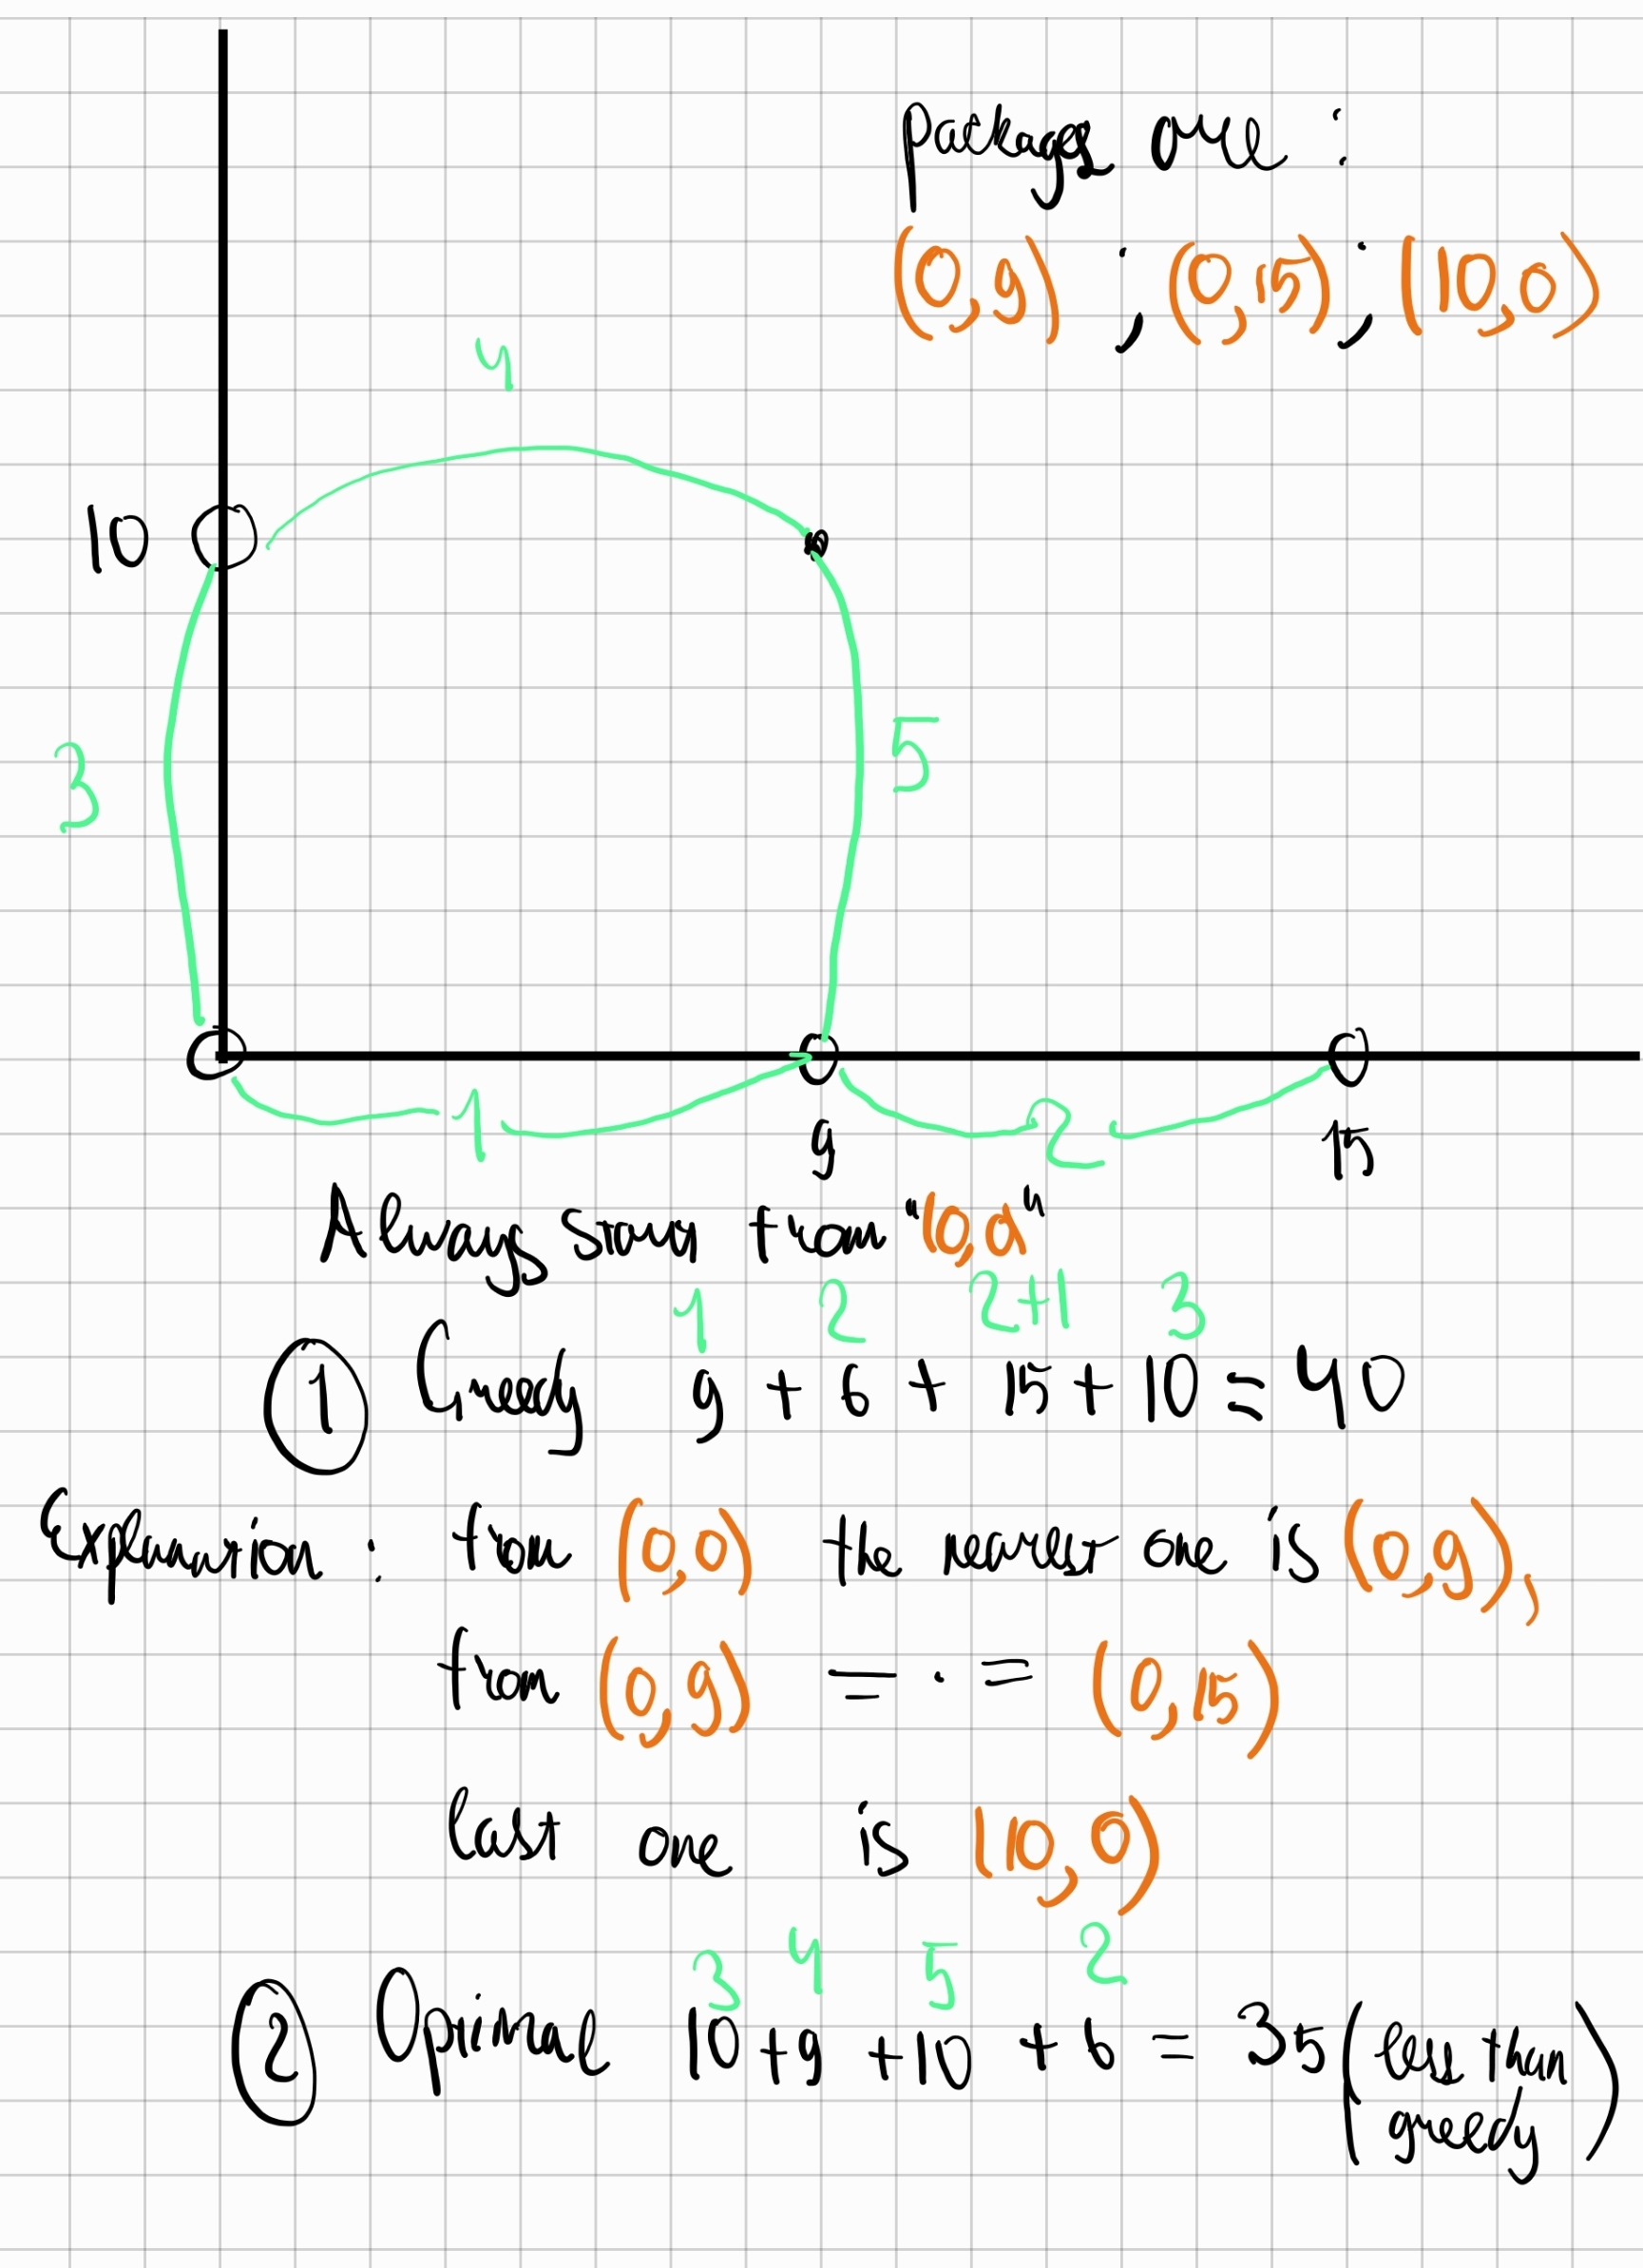

